In [1]:
%matplotlib inline

Below code is taken from 
https://courses.edx.org/courses/course-v1:MITx+6.008.1x+3T2016/course/


In [192]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def sample_from_finite_probability_space(finite_prob_space):
    """
    Produces a random outcome from a given finite probability space.

    Input
    -----
    - finite_prob_space: finite probability space encoded as a
      dictionary

    Output
    ------
    - random outcome, which is one of the keys in the
      finite_probability_space dictionary's set of keys
      (remember: these keys form the sample space)
    """

    # first produce a list of pairs of the form (outcome, outcome probability)
    outcome_probability_pairs = list(finite_prob_space.items())

    # convert the pairs into two lists "outcomes" and "outcome_probabilities":
    # - outcomes: list of outcomes
    # - outcome_probabilities: i-th element is the probability of the i-th
    #   outcome in the "outcomes" list
    # (note that this step is needed because NumPy wants these lists
    # separately)
    outcomes, outcome_probabilities = zip(*outcome_probability_pairs)

    # use NumPy to randomly sample
    random_outcome = np.random.choice(outcomes, p=outcome_probabilities)
    return random_outcome


def flip_fair_coin():
    """
    Returns a fair coin flip.

    Output
    ------
    - either the string 'heads' or 'tails'
    """
    finite_prob_space = {'heads': 0.5, 'tails': 0.5}
    return sample_from_finite_probability_space(finite_prob_space)


def flip_fair_coins(number_of_coins):
    """
    Returns a list of fair coin flip results.

    Input
    -----
    - number_of_coins: number of coin flips

    Output
    ------
    - list of length <number_of_coins> consisting of strings 'heads'/'tails'
    """
    finite_prob_space = {'heads': 0.5, 'tails': 0.5}
    return [sample_from_finite_probability_space(finite_prob_space)
            for i in range(number_of_coins)]


def plot_discrete_histogram(array, frequency=False, figsize=(5, 4)):
    """
    Plots a discrete histogram given a 1D array of values.

    Input
    -----
    - array: 1D array consisting of data
    - frequency: boolean (True => plot frequencies, False => plot counts)
    - figsize: tuple (width, height) of how large to make the plotted figure
    """
    array_as_series = pd.Series(array)

    counts = array_as_series.value_counts().sort_index()  
    print(type(counts))
    print(counts)
    print(type(s))
    if frequency:
        counts /= counts.sum()

    plt.figure(figsize=figsize)

    plt.xlabel('Value')
    if frequency:
        plt.ylabel('Frequency')
    else:
        plt.ylabel('Count')

    axis = counts.plot(kind='bar')
    figure = axis.get_figure()
    figure.autofmt_xdate()  # rotates x-axis labels to be more readable
    plt.tight_layout()  # tidy up and remove some margins

def scatter_plot(no_of_bets, x_return, no_of_runs):
    winning_value = []
    plt.axis([-1, no_of_runs, -10, 50])
    for i in range(no_of_runs):
        s = pd.Series(flip_fair_coins(no_of_bets))
        #print(s.value_counts()['heads'])
        win_lose = s.value_counts()['heads']*x_return-s.value_counts()['tails']
        #print(win_lose)
        winning_value.append(win_lose)
    plt.scatter(range(len(winning_value)),winning_value)
    #print(winning_value)

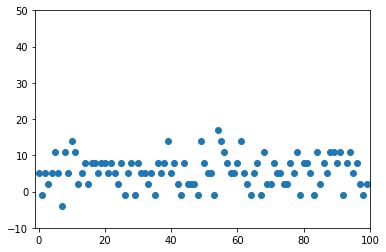

In [193]:
scatter_plot(10,2,100)